# Bokanalyse med Python

## Oppgave og planlegging

Oppgave: Vi skal lese inn en bok, vi skal så telle antallet av hvert ord vi finner, og til slutt vise hvilke ord som er mest brukt i boken. Er boken engelske, forventer vi f.eks. at ord som "the", "is", "a", etc. blir blant de mest brukte ordene. I mitt tilfelle bruker jeg Bibelen, bare fordi den er lett å finne på nettet, som plaintekst-fil, men det funker på alt. F.eks. kan du laste ned Hobbiten og analysere den i stedet.

Nå kan vi bruke flere steg for å prøve å løse denne oppgaven. Oppgaveteksten kunne vært noe så enkelt som "Lag en plot som viser de 10 mest brukte ordene i tekstfilen i synkende rekkefølge, som et søylediagram.", og da må vi kunne dele opp oppgaven i mindre steg, så vi klarer å se hvordan vi kan begynne.

Først kan vi lage en liten punktliste over hvilke steg vi må gjøre. Dette blir som en liten check-list over oppgaven. Den kan f.eks. se sånn ut:

1. Lese inn tekst fra fil
2. Splitte teksten til en liste med ord
3. Telle antallet av hvert ord
4. Sortere etter antallet ganger ordet er gjentatt
5. Plot listen (eller de 10 første elementene i listen)

Oppgaven kan løses på flere måter, men dette er kanskje en av de enkleste måtene å gjøre det på.

Nå som vi har delt opp funksjonaliteten i flere mindre steg, kan vi lage funksjoner som gjør hvert enkelt steg.

In [1]:
def les_fra_fil():
    with open('Data/bible.txt', 'r') as f:
        text = f.read()
    return text

Vi kan se om funksjonen gjør det vi forventer, ved å skrive ut resultatet. Fordi boken vår er _veldig_ lang, skriver jeg bare ut de første 58 tegnene. Dette gjør jeg med slicing.

In [2]:
boktekst = les_fra_fil()
print(boktekst[:58])

1:1 In the beginning God created the heaven and the earth.


Oki, det ser bra ut. Vi fikk starten på boken, og kan fortsette med del 2.

NB! Vi kan også se at scriptet vårt leste hele bokenl, 100 000 linjer, over 4 millioner bokstaver, på nesten ingen tid. Raskt! :D

## Data cleaning

Okay, listen over blir en forenkling. Dette er noe du ville sett når du får resultatene, men vi kommer til å finne ord som "the" og "The" som forskjellige ord. Vi kommer også til å finne "day." med punktum, "form," med komma, ord med binnestrek (f.eks. "two-edged"), osv. Den siste burde kanskje forbli ett ord i stedet for to? Eller ikke? Oppgaven spesifiserte ikke, så vi må bare velge. Jeg tenker vi regner det som to ord, og går derfra. Okay, så hvordan kan vi løse dette? Jo, en av måtene vi kan gjøre det på, er å bare bytte ut alle tegn (",.-+") med mellomrom. Pseudokoden for det kan se noe sånt ut:

```
funksjon(tekst):
    gjør hele teksten lowercase
    bytt ut , . - " ' +++ med mellomrom, gjennom hele teksten
    returner oppdatert tekst
```

Skal vi lage dette til en funksjon, som vi kan kalle `clean_data`, kan vi gjøre det slik.

In [3]:
def clean_data_bad(tekst):
    tekst = tekst.lower()
    
    # Replacements
    tekst = tekst.replace(',', ' ')
    tekst = tekst.replace('.', ' ')
    tekst = tekst.replace(';', ' ')
    tekst = tekst.replace(':', ' ')
    tekst = tekst.replace('-', ' ')
    tekst = tekst.replace('_', ' ')
    tekst = tekst.replace('\'', ' ')
    tekst = tekst.replace('"', ' ')
    tekst = tekst.replace('!', ' ')
    tekst = tekst.replace('?', ' ')
    tekst = tekst.replace('+', ' ')

    return tekst

Okay, det ble mange byttinger. Siden vi gjentar kode mange ganger, kan vi tenke at vi kan bruke en loop her. Vi vil da loope over hvert tegn, og bytte ut med mellomrom. Dette kan se sånn ut.

In [4]:
def clean_data(tekst):
    tekst = tekst.lower()
    
    # Replacements
    for tegn in ',.;:-_\'"!?+0123456789$%&()[]{}/\\':
        tekst = tekst.replace(tegn, ' ')

    return tekst

Og så slapp vi å skrive så mange linjer med kode. Her kan vi bare legge til et nytt tegn i stringen, hvor vi finner noen flere tegn som klarer å snike seg inn i ordlisten vår. F.eks. tall, som jeg glemte i den forrige varianten. Der sparte vi 10 linjer, og kunne heller bare skrive 10 ekstra tegn.

Vi kan teste funksjonen, ved å skrive sende inn litt tekst, og se om vi får tilbake det vi forventer.

In [5]:
clean_data('1:1 In the beginning God created the heaven and the earth.')

'    in the beginning god created the heaven and the earth '

Okay, så vi har fått noen ekstra mellomrom, men det er ikke så farlig. De fjerner vi etterpå. Etterhvert som vi finner noen flere problemer med teksten, kan vi fylle inn nye regler som fikser teksten.

## Lage ordliste

Nå som vi har en funksjon som fikser teksten, kan vi begynne å splitte teksten til en liste med ord. Vi har `split`-funksjonen, som splitter på argumentet vi legger til (f.eks. `str.split(', ')`), eller bare på whitespace (altså mellomrom, tab, newline). Vi bruker den siste.

In [6]:
def lag_ordliste(tekst):
    return tekst.split()

Enkel og grei funksjon. Vi kan teste med den formatterte teksten fra forrige funksjon.

In [7]:
lag_ordliste('    in the beginning god created the heaven and the earth ')

['in',
 'the',
 'beginning',
 'god',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

Sweet! `split`-funksjonen (uten argumenter) lagde det om til en ordliste, og fjernet uønskede mellomrom i samme slengen. :D

## Telle antall ord

Okay, nå skal vi telle antall ord. Det er det flere måter å gjøre på. Jeg skal vise to varianter under. En ser veldig riktig ut, men er utrolig treg. Tenk gjerne gjennom hvilke, mens dere leser koden, så kan dere få svaret under.

### v1

Vi går gjennom ordlisten, ett ord av gangen, og bygger opp en `dict` vi kaller `ordfrekvenser`. Den kan være strukturert på følgende måte:

`key`: ord
`value`: antallet av dette ordet

E.g.

`{'the': 10_000, 'and': 2_000, ...}`

Pseudokode kan se sånn ut:

```
for ord in ordliste:
    +1 i ordfrekvenser[ord] (hvis ordfrekvenser[ord] ikke finnes, kan den settes til 0 først)
```

Altså, for hvert ord, sjekk om det finnes i dicten:
1. Om nei: sett `ordrekvenser[ord] = 0`, og så gjør steg 2.
2. Om ja: Øk `ordfrekvenser[ord]` med en. (`ordfrekvenser[ord] += 1`.)

In [8]:
def tell_antall_ord_1(ordliste):
    ordfrekvenser = {}
    for Ord in ordliste:
        # Sørge for at verdien finnes.
        if Ord not in ordfrekvenser:
            ordfrekvenser[Ord] = 0

        # Øke verdien med 1.
        ordfrekvenser[Ord] += 1
    return ordfrekvenser

Okay, så to ting.

1. Vi kaller verdien `Ord` i stedet for `ord`. Det er ikke superviktig, men en fordel. `ord` er en innebygget funksjon, og vi vil helst ikke overskrive disse. (Self om `ord`-funksjonen sjeldent brukes.)

2. Det er en veldig lik måte å gjøre denne if-tingen på. Koden kan også være noe sånt som:

```
if Ord no in ordfrekvenser:
    ordfrekvenser[Ord] = 1
else:
    ordfrekvenser[Ord] += 1
```

Begge gir samme resultat.

Okay, ferdig. Over til den andre varianten av funksjonen vår.

### v2

Vi lager et sett av ordlisten, og så bruker vi `ordliste.count(ord)` for å finne antallet av hvert ord i listen. Det kan se noe sånt ut:

```
for ord in ordsett:
    print(ordliste.count(ord))
```

Her printer vi bare, men vi kan så lagre det i en `dict`.

Lager vi dette sammen til en funksjon, kan den se sånn ut.

In [9]:
def tell_antall_ord_2(ordliste):
    ordfrekvenser = {}
    ordsett = set(ordliste)
    for Ord in ordsett:
        ordfrekvenser[Ord] = ordliste.count(Ord)
    return ordfrekvenser

Vi kan så teste funksjonen med ordlisten fra forrige test.

In [10]:
tell_antall_ord_2(['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth'])

{'beginning': 1,
 'in': 1,
 'the': 3,
 'created': 1,
 'heaven': 1,
 'earth': 1,
 'and': 1,
 'god': 1}

Vi kan se at ordet "the" ble brukt 3 ganger i teksten, mens de andre ordene bare ble brukt 1 gang hver. Og det ser ut til å stemme med ordlisten.

### Sammenlikne v1 og v2

Okay, så jeg sa at en av disse utrolig treg. V2 virker, hvertfall for meg, som det naturlige valget. Den bruker `set`, som er mye raskere enn lister på en del operasjoner, den bruker `str.count` til å telle, i stedet for å gjøre det på en mer manuell måte. Derfor virker den som det beste valget. Men. Den er ikke det beste valget. Det er ekstreeeemt mye tregere enn den første metoden. Under finner vi kode som kan kjøre begge.

In [11]:
tekst = les_fra_fil()
tekst = clean_data(tekst)
ordliste = lag_ordliste(tekst)
len(ordliste)

794812

In [12]:
print(tell_antall_ord_1(ordliste))
# tell_antall_ord_2(ordliste)

{'in': 12724, 'the': 64193, 'beginning': 107, 'god': 4472, 'created': 47, 'heaven': 583, 'and': 51763, 'earth': 987, 'was': 4523, 'without': 434, 'form': 28, 'void': 25, 'darkness': 162, 'upon': 2750, 'face': 416, 'of': 34782, 'deep': 65, 'spirit': 505, 'moved': 75, 'waters': 287, 'said': 3999, 'let': 1511, 'there': 2301, 'be': 7032, 'light': 272, 'saw': 548, 'that': 12927, 'it': 6141, 'good': 720, 'divided': 69, 'from': 3657, 'called': 633, 'day': 1743, 'he': 10422, 'night': 307, 'evening': 60, 'morning': 227, 'were': 2772, 'first': 443, 'a': 8235, 'firmament': 17, 'midst': 364, 'divide': 49, 'made': 1405, 'which': 4420, 'under': 397, 'above': 223, 'so': 1690, 'second': 181, 'gathered': 267, 'together': 484, 'unto': 8997, 'one': 1971, 'place': 717, 'dry': 71, 'land': 1718, 'appear': 55, 'gathering': 11, 'seas': 25, 'bring': 725, 'forth': 896, 'grass': 62, 'herb': 19, 'yielding': 7, 'seed': 280, 'fruit': 208, 'tree': 201, 'after': 1179, 'his': 8473, 'kind': 46, 'whose': 314, 'is': 7014

For meg tar v2 ca. 67 s, mens v1 bare tar ca. 0.1 s. En veldig stor forskjell! Men hvorfor det!? Jo, fordi `str.count` går igjennom _hele listen per element i settet_.

In [13]:
len(ordliste), len(set(ordliste))

(794812, 12892)

Som vi ser, har vi ca. 800 000 ord i ordlisten, og 13 000 ord i ordsettet. **v1** vil gå gjennom alle 800 000 ordene og manuelt telle opp en og en. **v2** derimot, vil går gjennom alle 800 000 ordene i ordsettet, for hvert ord i ordsettet. Altså $800 \, 000 \cdot 13 \, 000 = 10 \, 400 \, 000 \, 000$ ganger! Altså vil v1 gjøre ca. 800 000 sammenlikninger/operasjoner, mens v2 vil gjøre ca. 10 milliarder.

Dette er et prakteksempel på hvordan noen algoritmer vokser mye raskere enn andre. Hvis du lager en funksjon som er treg, vurder om du looper over en liste flere ganger enn du egentlig trenger.

Noe som er pensum for hvertfall TDT4110, men ikke TDT4111, er noe som heter "Big O notation". Det sier noe om hvordan algoritmer sin hastighet vokser etterhvert som antallet elementer i f.eks. en liste vokser. Noen vokser lineært, andre polynomt, andre igjen eksponensielt. Du kan lese mer om det på [Wikipedia-artikken](https://en.wikipedia.org/wiki/Big_O_notation), men det er ikke pensum.

### Sortere verdiene

Beste metode: Google og kopier fra StackOverflow.

Okay, så nå er vi ferdig med funksjonen(e) som finner antallet ganger hvert ord er gjentatt. Vi kan gå over på det nest siste punktet: Sortere verdiene.

Noen husker sikkert oppgaven med økonomisk analyse, verdier i en dict kunne sorteres. Det er ikke så enkelt, så vi gjør en vri. I stedet for en dict som ser sånn ut:

```
ordfrekvenser = {
    'the': 10_000,
    'and': 2_000,
    ...
}
```

vil vi ha en liste med tupler, som ser sånn ut:

```
ordfrekvenser = [
    (10_000, 'the'),
    (2_000, 'and'),
    ...
]
```

Hvorfor? Fordi liste med tuples kan sorteres. Grunnen til at vi ikke brukte dette i utgangspunktet, er at vi da ikke kunne skrevet `ordfrekvenser[ord]`.
Grunnen til at rekkefølgen på `key` og `value` er byttet om, er at sortering ser først på den først verdien. Hadde det stått `('the': 10_000)`, hadde vi bare sortert listen i alfabetisk rekkefølge.

**Utenfor pensum**

Kan vi løse dette uten å bytte rekkefølge? Ja. Vi kan si `sort(key=f)`, hvor `f` er en funksjon som tar i mot _en_ verdi (en tuple), og returnerer indeks 1 fra denne tuplen. Slik som dette:

```
def f(x):
    return x[1]

ordfrekvensliste.sort(key=f)
```

Dette funker enda bedre med `lambda`-funksjoner, men de er heller ikke pensum.

**Innenfor pensum igjen**

Okay, så hvordan kan vi lage en tuple-liste fra en dictionary? Jo, vi kan gå gjennom ett og ett `key`-`value`-par, for så å legge de inn som en tuple, og legge de til i en liste. Vi lager en egen funksjon for dette. Nå vi først holder på, kan vi like gjerne sortere den til slutt.

Husk: `liste.sort()` og `liste = sorted(liste)` gjør det samme. Begge er like riktige.

Vi bruker `reverse=True` for å sørge for at den blir i synkende rekkefølge, ikke stigende.

In [14]:
def dict_to_sorted_tuple_list(ordfrekvenser):
    sortert_ordfrekvensliste = []
    for key, value in ordfrekvenser.items():
        ny_tuple = (value, key)
        sortert_ordfrekvensliste.append(ny_tuple)
    sortert_ordfrekvensliste.sort(reverse=True)
    return sortert_ordfrekvensliste

Nå som vi har den, kan vi kjøre den på verdiene fra forrige funksjon.

In [15]:
ordfrekvenser = tell_antall_ord_1(ordliste)
sortert_ordfrekvensliste = dict_to_sorted_tuple_list(ordfrekvenser)
sortert_ordfrekvensliste

[(64193, 'the'),
 (51763, 'and'),
 (34782, 'of'),
 (13660, 'to'),
 (12927, 'that'),
 (12724, 'in'),
 (10422, 'he'),
 (9840, 'shall'),
 (8997, 'unto'),
 (8996, 'for'),
 (8854, 'i'),
 (8473, 'his'),
 (8235, 'a'),
 (7964, 'lord'),
 (7379, 'they'),
 (7032, 'be'),
 (7014, 'is'),
 (6659, 'him'),
 (6617, 'not'),
 (6430, 'them'),
 (6141, 'it'),
 (6057, 'with'),
 (5638, 'all'),
 (5474, 'thou'),
 (4600, 'thy'),
 (4523, 'was'),
 (4472, 'god'),
 (4420, 'which'),
 (4368, 'my'),
 (4096, 'me'),
 (3999, 'said'),
 (3997, 'but'),
 (3983, 'ye'),
 (3942, 'their'),
 (3909, 'have'),
 (3843, 'will'),
 (3827, 'thee'),
 (3657, 'from'),
 (3531, 'as'),
 (2970, 'are'),
 (2835, 'when'),
 (2829, 'this'),
 (2776, 'out'),
 (2772, 'were'),
 (2750, 'upon'),
 (2735, 'man'),
 (2686, 'you'),
 (2643, 'by'),
 (2575, 'israel'),
 (2543, 'king'),
 (2392, 'son'),
 (2383, 'up'),
 (2301, 'there'),
 (2264, 'hath'),
 (2169, 'then'),
 (2146, 'people'),
 (2093, 'came'),
 (2026, 'had'),
 (2024, 'house'),
 (2022, 'on'),
 (2015, 'into')

Her innså jeg at tegn som "$", "%" og parenteser fortsatt er en del av teksten, så da må vi opp å oppdatere `clean_data` funksjonen vår.

Men blam! Vi ser at ordene "the", "and", "of", etc. er på toppen, og det er jo ca. det vi kunne forvente. En litt interessant ting her, er at nesten 10% av ordene i bibelen er ordet "the".

### Plotting

Vi skal plotte, og da trenger vi bibloteket/modulen `matplotlib`. Først må den installeres, så må den importeres. Det gjør vi slik:

In [16]:
import matplotlib.pyplot as plt

Når vi har modulen inne, er det relativt enkelt å lage en søylediagram. Det kan vi gjøre med `plt.bar(X, Y)`, og da trenger vi bare en liste med `X`-verdier (titler/ord) og `Y`-verdier (antall).

...

-_-

Og her innser vi at vi enda en gang må omgjøre dataen vår. Fra liste med tuples til to lister. Yay. Vi lager en funksjon som gjør det.

In [17]:
def liste_med_tuples_til_to_lister(sortert_ordfrekvensliste):
    # Lange funksjons- og variabalnavn. Woo.
    X = []
    Y = []

    # Denne gjør det samme som de neste to linjene, men splitter direkte i for-linjen.
    # for antall, Ord in sortert_ordfrekvensliste:
    for par in sortert_ordfrekvensliste:
        antall, Ord = par
        X.append(Ord)
        Y.append(antall)
    return X, Y

Kjører vi funksjonen vår nå, burde vi få to lister.

In [18]:
X, Y = liste_med_tuples_til_to_lister(sortert_ordfrekvensliste)

De kan vi plotte med en gang, og så er vi enderlig ferdig. :D

Men en siste ting: Nå har `X` og `Y` _alle_ ordene, ikke bare de 10 mest brukte. Det kan ta lang tid å plotte (ca. 40 s) og blir en stygg plot. Derfor bruker vi bare de 10 først verdiene i listene ved hjelp av slicing. (`X[:10]`.)

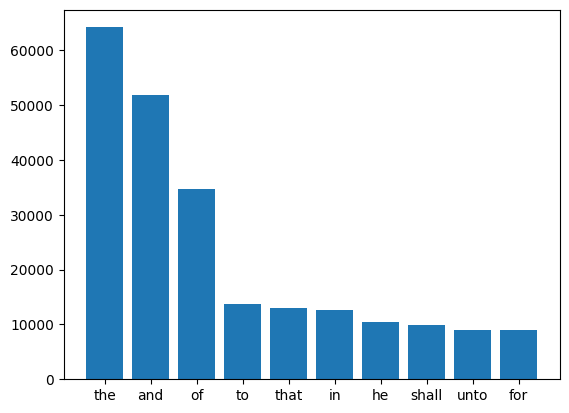

In [19]:
# plt.bar(X, Y)
plt.bar(X[:10], Y[:10])
plt.savefig('Data/bible_ordfrekvens.png')  # Lagre plottet som en bildefil.
plt.show()

Baaam! Ferdig! :D  Vi lagret også plottet når vi først var i gang, sånn at vi slipper å kjøre programmet for å se plottet.

## Lagre som CSV-fil

Kan vi lagre dataene vi har funnet i en CSV-fil (som kan åpnes i bl.a. Excel)? Nei. Jo da. Haha... :))

Det vi må gjøre, er å lage en string ut av dataene, og så skrive den til en fil. Hvis vi går igjennom ett og ett par i `sortert_ordfrekvensliste`, og legger til verdiene i en string, og legger de til en hovedstring, så er vi langt på vei. Dette gjør jeg uten funksjoner.

In [20]:
csv_string = 'Ord, Antall\n'
for par in sortert_ordfrekvensliste:
    antall, Ord = par
    csv_string += f'{Ord}, {antall}\n'

Sånn, nå kan vi skrive ut `csv_string` til en fil.

In [21]:
with open('Data/bible_ordfrekvens.csv', 'w') as f:
    f.write(csv_string)

Sånn! Denne filen kan vi åpne i Excel, eller sende til en venn, eller lagre som en del av en øving, osv.

## Oppgave 2: Finne PIN-kode

Denne oppgaven baserer seg på det vi har gjort så langt. Oppgave, sånn jeg har hørt den før (og jeg vet ikke om dette er sant, men sikkert delvis sant. Idk. Google it.), er:

Politiet må låse opp en telefon. En sånn gammeldags en, hvor du trykker på f.eks. 2 for å få a/b/c, osv. De vet at PIN-koden er 6 tall lang, og ofte også skriver ut et ord. Ergo leter vi etter et ord med 6 bokstaver. Vi har tilgang til dagboken (med i vårt tilfelle er det Bibelen vi skal bruke), og er interessert i å finne de mest brukte seksbokstaversordene i boken. Kanskje en av disse er PIN-koden?

Oppgaven er derfor: Finn de (10) mest brukte ordene i boken, som har akkurat 6 bokstaver.

Vi har nå fordelen av vi har masse kode som allerede gjør noe liknende. Vi har en sortert liste med tuples med antall og ord (`sortert_ordfrekvensliste`). Vi kan ta denne, gå gjennom en og en tuple, og ekskludere alle som hvor ordlengden ikke er lik 6. Vi lager en funksjon for dette. Vi går igjennom ett og ett par, og legger det til i en ny liste, bare hvis lengden er riktig. Husk at en tuple (`par`) består av (`antall`, `ord`), og vi er bare interessert i lengden på `ord` akkurat nå.

In [22]:
def ord_med_lengde_6(sortert_ordfrekvensliste):
    sortert_6er_ordliste = []
    for par in sortert_ordfrekvensliste:
        if len(par[1]) == 6:
            sortert_6er_ordliste.append(par)
    return sortert_6er_ordliste

In [23]:
sortert_6er_ordliste = ord_med_lengde_6(sortert_ordfrekvensliste)
X6, Y6 = liste_med_tuples_til_to_lister(sortert_6er_ordliste)

Nå har vi de resterende ordene, og vi kan plotte de.

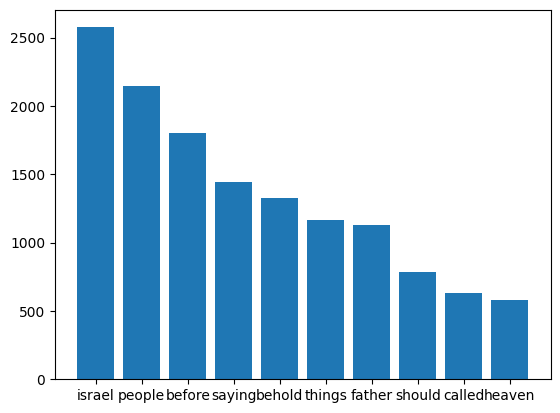

In [24]:
plt.bar(X6[:10], Y6[:10])
plt.savefig('Data/bible_ordfrekvens_len=6.png')
plt.show()

Og da kan vi se at ordet "israel" er mest brukt, etterfulgt av "people", osv.

## Bonus - Språkanalyse

En fun fact vi kan se uten så mye ekstraarbeid her, er formen til plottet hvis vi bruker f.eks. 100 verdier. Vi lager et line-chart, i stedet for et bar-chart, sånn at linjen blir tydeligere. (Her dropper jeg `X`-verdiene, men det går bra med en vanlig `plot`.)

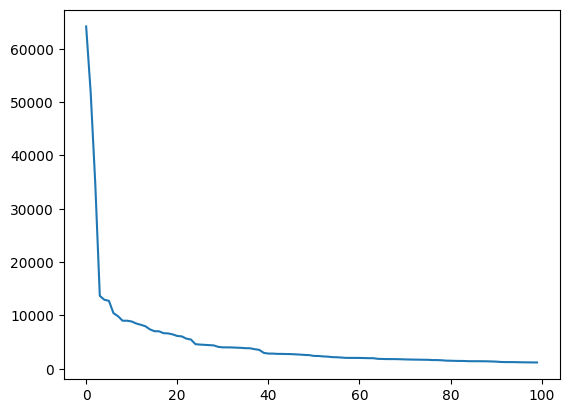

In [25]:
plt.plot(Y[:100])
plt.savefig('Data/bible_ordfrekvens_zipfs_law.png')
plt.show()

Vi ser at noen ord brukes veldig masse, men at frekvensen synker fort. Hvis jeg setter dette til en logaritmisk skala på x- og y-aksen (utenfor pensum), får vi dette.

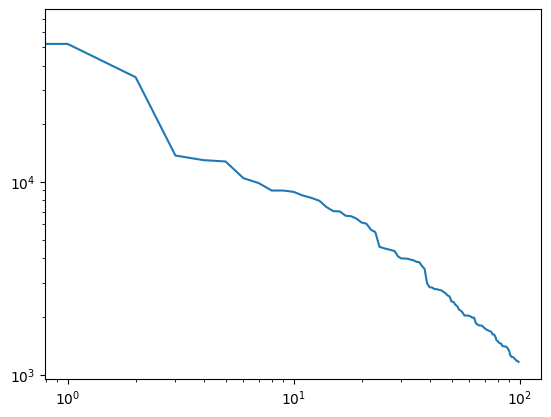

In [26]:
plt.plot(Y[:100])
plt.xscale('log')
plt.yscale('log')
plt.savefig('Data/bible_ordfrekvens_zipfs_law_log.png')
plt.show()

En strek som er nesten rett. Det som er kult er at alle språk (og veldig mange andre ting) følger dette mønsteret. Se [Zipfs lov på Wikipedia](https://en.wikipedia.org/wiki/Zipf's_law) for mer om dette eller [denne YouTube-videoen fra Vsauce](https://youtu.be/fCn8zs912OE) (21 min). Dette er selvfølgelig utenfor pensum, men kule analyser vi kan gjøre med det vi kan nå.

## Summary

I disse oppgavene har vi gjort mange ting. Vi har lest og skrevet til/fra filer. Vi har renset data, sånn at det passer bedre for analysene våre. Vi har endret formen vi lagrer data på flere ganger (liste -> dict -> tuple-liste -> lister). (Dette er ikke uvanlig.) Vi har plottet data. Vi har så løst en politietterforskning, og analysert hvordan språk fungerer. Her anallyserte vi en bok, men dette kan gjøres over hvilke som helst bok, og viktigere, det meste av dette kan gjøres for helt andre ting enn bøker.

En relatert lov, [Benfords lov](https://en.wikipedia.org/wiki/Benford's_law), kan brukes til å bl.a. avdekke økonomisk svindel/skattesvindel, valgfusk, og mer.